In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import sklearn.tree

In [195]:
#### Load dataset

dataset = pd.read_csv('./train.csv')

In [196]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [197]:
#### Data preprocessing


# Remove Cabin feature
# Remove name from training
# Remove ticket number
# Remove passenger id
dataset = dataset[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]


# Male and female converted to -1 and 1
dataset = dataset.replace('male',-1)
dataset = dataset.replace('female',1)

# Embarked column => C=1, Q=2, S=3
dataset = dataset.replace('C',int(1))
dataset = dataset.replace('Q',int(2))
dataset = dataset.replace('S',int(3))


# Family_size = SibSp + Parch
dataset['Fsize'] = dataset['SibSp']+dataset['Parch']

# Fare_per_person = Fare/Family_size
dataset['FareP'] = dataset['Fare']/(dataset['Fsize']+1)

# Remove samples with nan/empty data
boolList = np.asarray([True]*dataset.shape[0],dtype='bool')
for i in range(dataset.shape[1]):
    boolList = np.logical_and(boolList, np.logical_not(np.asarray(dataset[dataset.columns[i]].isnull(),dtype='bool')))
    
dataset = dataset.loc[list(boolList)]

In [198]:
dataset = dataset.reset_index(drop=True)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fsize,FareP
0,0,3,-1,22.0,1,0,7.2500,3.0,1,3.625000
1,1,1,1,38.0,1,0,71.2833,1.0,1,35.641650
2,1,3,1,26.0,0,0,7.9250,3.0,0,7.925000
3,1,1,1,35.0,1,0,53.1000,3.0,1,26.550000
4,0,3,-1,35.0,0,0,8.0500,3.0,0,8.050000
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,2.0,5,4.854167
708,0,2,-1,27.0,0,0,13.0000,3.0,0,13.000000
709,1,1,1,19.0,0,0,30.0000,3.0,0,30.000000
710,1,1,-1,26.0,0,0,30.0000,1.0,0,30.000000


In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset[dataset.columns[1:10]],
    dataset[dataset.columns[0]],test_size=0.2, random_state=367)

In [200]:
#### DT

DT = DecisionTreeClassifier(max_depth=13) # At depth 13 the test accuracy is highest
model = DT.fit(X_train,y_train)

y_h = DT.predict(X_train)
y_h_test = DT.predict(X_test)

print('Train accuracy: ',accuracy_score(y_train,y_h)*100,'%')
print('Test accuracy: ',accuracy_score(y_test,y_h_test)*100,'%')

Train accuracy:  96.66080843585237 %
Test accuracy:  76.22377622377621 %


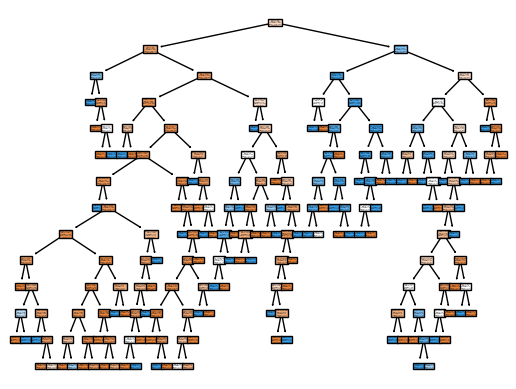

In [189]:
plt.figure()
sklearn.tree.plot_tree(DT,
                       feature_names=['Pclass', 'Sex','Age','SibSp','Parch','Fare','Embarked','Fsize','FareP'],
                       class_names=['No','Yes'],filled=True)
plt.savefig('DT.svg',format='svg')

In [201]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fsize,FareP
0,0,3,-1,22.0,1,0,7.2500,3.0,1,3.625000
1,1,1,1,38.0,1,0,71.2833,1.0,1,35.641650
2,1,3,1,26.0,0,0,7.9250,3.0,0,7.925000
3,1,1,1,35.0,1,0,53.1000,3.0,1,26.550000
4,0,3,-1,35.0,0,0,8.0500,3.0,0,8.050000
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,2.0,5,4.854167
708,0,2,-1,27.0,0,0,13.0000,3.0,0,13.000000
709,1,1,1,19.0,0,0,30.0000,3.0,0,30.000000
710,1,1,-1,26.0,0,0,30.0000,1.0,0,30.000000


In [207]:
#### 5-fold CV with DT mean classification acc
test_acc = []
train_acc = []


kf = KFold(n_splits=5,random_state=367, shuffle=True)
for i, (train_idx,test_idx) in enumerate(kf.split(dataset)):
    DT = DecisionTreeClassifier(max_depth=13) # At depth 13 the test accuracy is highest
    
    X_train = dataset.loc[train_idx,dataset.columns[1:10]]
    X_test = dataset.loc[test_idx,dataset.columns[1:10]]
    y_train = dataset.loc[train_idx,dataset.columns[0]]
    y_test = dataset.loc[test_idx,dataset.columns[0]]
    
    model = DT.fit(X_train,y_train)

    y_h = DT.predict(X_train)
    y_h_test = DT.predict(X_test)

    print('Split: ',i)
    print('Train accuracy: ',accuracy_score(y_train,y_h)*100,'%')
    print('Test accuracy: ',accuracy_score(y_test,y_h_test)*100,'%')
    
    test_acc.append(accuracy_score(y_test,y_h_test)*100)
    train_acc.append(accuracy_score(y_train,y_h)*100)
    
    
print('\n\nAverage test accuracy: ', np.mean(np.asarray(test_acc)),'%')
print('Average train accuracy: ', np.mean(np.asarray(train_acc)),'%')

Split:  0
Train accuracy:  97.36379613356766 %
Test accuracy:  72.72727272727273 %
Split:  1
Train accuracy:  96.66080843585237 %
Test accuracy:  82.51748251748252 %
Split:  2
Train accuracy:  96.49122807017544 %
Test accuracy:  74.64788732394366 %
Split:  3
Train accuracy:  98.42105263157895 %
Test accuracy:  79.5774647887324 %
Split:  4
Train accuracy:  98.0701754385965 %
Test accuracy:  76.76056338028168 %


Average test accuracy:  77.2461341475426 %
Average train accuracy:  97.40141214195418 %


In [209]:
#### 5-fold CV with RF mean classification acc
test_acc = []
train_acc = []


kf = KFold(n_splits=5,random_state=367, shuffle=True)
for i, (train_idx,test_idx) in enumerate(kf.split(dataset)):
    RF = RandomForestClassifier()
    
    X_train = dataset.loc[train_idx,dataset.columns[1:10]]
    X_test = dataset.loc[test_idx,dataset.columns[1:10]]
    y_train = dataset.loc[train_idx,dataset.columns[0]]
    y_test = dataset.loc[test_idx,dataset.columns[0]]
    
    model = RF.fit(X_train,y_train)

    y_h = RF.predict(X_train)
    y_h_test = RF.predict(X_test)

    print('Split: ',i)
    print('Train accuracy: ',accuracy_score(y_train,y_h)*100,'%')
    print('Test accuracy: ',accuracy_score(y_test,y_h_test)*100,'%')
    
    test_acc.append(accuracy_score(y_test,y_h_test)*100)
    train_acc.append(accuracy_score(y_train,y_h)*100)
    

print('\n\nAverage test accuracy: ', np.mean(np.asarray(test_acc)),'%')
print('Average train accuracy: ', np.mean(np.asarray(train_acc)),'%')


Split:  0
Train accuracy:  99.29701230228471 %
Test accuracy:  73.42657342657343 %
Split:  1
Train accuracy:  98.76977152899823 %
Test accuracy:  80.41958041958041 %
Split:  2
Train accuracy:  98.7719298245614 %
Test accuracy:  80.98591549295774 %
Split:  3
Train accuracy:  98.7719298245614 %
Test accuracy:  80.28169014084507 %
Split:  4
Train accuracy:  98.7719298245614 %
Test accuracy:  80.28169014084507 %


Average test accuracy:  79.07908992416034 %
Average train accuracy:  98.87651466099344 %
